## Amazon yorumları için duygu analizi

Review: Ürüne yapılan yorum
Title: Yorum içeriğine verilen başlık
Helpful: Yorumu faydalı bulan kişi sayısı
Star: Ürüne verilen yıldız sayısı

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings
from scipy.stats import loguniform


filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' %x)
pd.set_option('display.width', 200)

In [53]:
df=pd.read_excel("amazon.xlsx")
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


In [55]:
#Normalizing case folding
df['Review']=df['Review'].str.lower()
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

In [56]:
#Punctuations
df['Review']=df['Review'].str.replace('[^\w\s\!]', '')
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

In [57]:
import string

# Tüm noktalama işaretleri
punctuation_chars = set(string.punctuation)

# 'Review' sütunundaki her bir metindeki tüm noktalama işaretlerini kaldırma
df['Review'] = df['Review'].apply(lambda x: ''.join(char for char in str(x) if char not in punctuation_chars))

df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windowsbr imagery ...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i cant believe the qua...
                              ...                        
5606    great product for reasonable money  delivered ...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609     brought out the beauty in kids room they love it
5610    very cute curtains in my sons room thick enoug...
Name: Review, Length: 5611, dtype: object

In [58]:
#Numbers
df['Review']=df['Review'].str.replace('\d', '')
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windowsbr imagery ...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i cant believe the qua...
                              ...                        
5606    great product for reasonable money  delivered ...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609     brought out the beauty in kids room they love it
5610    very cute curtains in my sons room thick enoug...
Name: Review, Length: 5611, dtype: object

In [59]:
#Stopwords: Anlamsız verilerin veriden kaldırılması
sw=stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
df['Review']=df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['Review']

0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme studioliv...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [61]:
#Rarewords / Custom Words 
delete=pd.Series(' '.join (df['Review']).split()).value_counts()[-1000:]
delete

recommendations       1
infield               1
durning               1
bohemianold           1
englishrusticfancy    1
                     ..
thembron              1
setter                1
55                    1
mint                  1
studioliving          1
Name: count, Length: 1000, dtype: int64

In [62]:
df['Review']=df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in delete))
df['Review']

0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme area phot...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [63]:
#Lemmatization
df['Review']=df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Review'].head(10)

0                                                happy
1       good quality material however panel mismatched
2    product fun bedroom windowsbr imagery bit stre...
3    lo unico que gustaria e que sean un poco ma la...
4    great bang buck cant believe quality material ...
5                                 look different photo
6    exactly looking heavy material great price shi...
7    looking picture thought curtain would thinner ...
8    much whiter thought would wasn’t really expect...
9    curtain picture show 3rd set ambesonne curtain...
Name: Review, dtype: object

### Metin Görselleştirme

In [64]:
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]

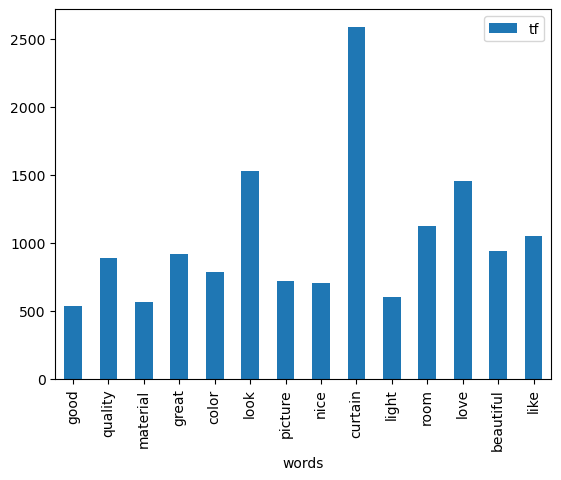

In [65]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

### Wordcloud

In [66]:
text=" ".join(i for i in df.Review)

wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)


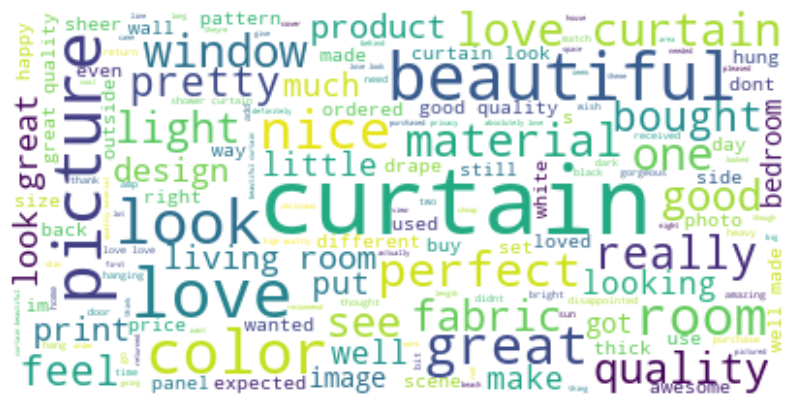

In [67]:
# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Duygu Analizi

In [68]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,happy
1,5,0,Pattern did not align between the two panels.,good quality material however panel mismatched
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windowsbr imagery bit stre...
3,5,0,Que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...
4,5,0,Wow great purchase,great bang buck cant believe quality material ...


In [69]:
#nltk paketindeki SentimentIntensityAnalyzer nesnesinin oluşturulması
sia = SentimentIntensityAnalyzer()

In [70]:
#ilk 10 gözlem için polarity score
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...
2    {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...
7    {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [71]:
#üstteki ilk 10 gözlem için comound skorlarına göre filtrelenerek tekrar gözlemleme
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.57
1   0.44
2   0.72
3   0.00
4   0.90
5   0.00
6   0.62
7   0.91
8   0.00
9   0.71
Name: Review, dtype: float64

In [72]:
#10 gözlemin 0'dan büyüklüğüne göre pos ve neg tagları ile güncelleme
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"]>0 else "neg")

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

In [73]:
#Yeni değişken olarak dataya eklenmesi
df["Sentiment_Label"]=df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"]>0 else "neg")
df["Sentiment_Label"]

0       pos
1       pos
2       pos
3       neg
4       pos
       ... 
5606    pos
5607    neg
5608    pos
5609    pos
5610    pos
Name: Sentiment_Label, Length: 5611, dtype: object

In [74]:
df.groupby("Sentiment_Label")["Star"].mean()

Sentiment_Label
neg   3.40
pos   4.58
Name: Star, dtype: float64

### Makine öğrenimine geçiş

In [75]:
train_x, test_x, train_y, test_y = train_test_split(df["Review"],
                                                   df["Sentiment_Label"],
                                                   random_state=42)

#### Verileri makine öğrenmesi modallerine verebilmek amacıyla temsil şekillerini sayısallaştırmamız gerekiyor

In [76]:
#TF-IDF Word Level
tf_idf_word_vectorizer=TfidfVectorizer().fit(train_x)
x_train_tf_idf_word=tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word=tf_idf_word_vectorizer.transform(test_x)

##### Lojistik regresyon ile modelleme

In [77]:
log_model=LogisticRegression().fit(x_train_tf_idf_word, train_y)

In [78]:
log_model=LogisticRegression().fit(x_train_tf_idf_word, train_y)
y_pred=log_model.predict(x_test_tf_idf_word)
cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()

0.8553152008134214

In [79]:
y_pred=log_model.predict(x_test_tf_idf_word)

In [80]:
print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

         neg       0.31      0.95      0.47        73
         pos       1.00      0.88      0.94      1330

    accuracy                           0.89      1403
   macro avg       0.65      0.92      0.70      1403
weighted avg       0.96      0.89      0.91      1403



In [81]:
cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()

0.8553152008134214

In [82]:
# Veriden bulunan yorumlardan rastgele seçerek modele sorulması
random_review=pd.Series(df["Review"].sample(1).values)
new_command=CountVectorizer().fit(train_x).transform(random_review)
pred=log_model.predict(new_command)
print(f'Review : {random_review} \n Prediction: {pred}')

Review : 0    color way brighter pic even shade drawn backgr...
dtype: object 
 Prediction: ['pos']


##### Random Forest ile modelleme

In [83]:
rf_model= RandomForestClassifier().fit(x_train_tf_idf_word, train_y)
cross_val_score(rf_model, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

0.894517031011693

In [84]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split


In [85]:
# Veriyi eğitim ve test setlerine ayırın
x_train, x_test, y_train, y_test = train_test_split(x_train_tf_idf_word, train_y, test_size=0.2, random_state=42)

# Hiperparametre dağılımlarını belirtin
param_dist = {
    'C': loguniform(1e-5, 100),  # Loguniform dağılımı
    'max_iter': [50, 100, 200],
    'solver': ['liblinear', 'lbfgs', 'newton-cg']
}


In [86]:
log_reg_model = LogisticRegression()


In [87]:
random_search = RandomizedSearchCV(log_reg_model, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, random_state=42)

In [88]:
# Modeli eğitin
random_search.fit(x_train, y_train)

# En iyi parametreleri ve doğruluk değerini alın
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

In [89]:
best_model = random_search.best_estimator_


In [90]:
from sklearn.metrics import accuracy_score


In [91]:
# Test seti üzerinde modelin performansını değerlendirin
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)


In [92]:
print("En İyi Hiperparametreler:", best_params)
print("Eğitim Setinde En İyi Doğruluk:", best_accuracy)
print("Test Setinde Doğruluk:", test_accuracy)

En İyi Hiperparametreler: {'C': 1.330324510152291, 'max_iter': 50, 'solver': 'liblinear'}
Eğitim Setinde En İyi Doğruluk: 0.8826521928915657
Test Setinde Doğruluk: 0.9026128266033254
